df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/ACCESS-CM2_histupdated.nc')

In [68]:
df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/ACCESS-CM2_histupdated.nc')

In [69]:
df

<xarray.Dataset>
Dimensions:    (time: 81668, bnds: 2, lon: 26, lat: 23)
Coordinates:
  * time       (time) object 1959-01-01 12:00:00 ... 2015-01-01 00:00:00
  * lon        (lon) float64 150.6 152.1 153.6 155.1 ... 183.6 185.1 186.6 188.1
  * lat        (lat) float64 -59.38 -57.88 -56.38 ... -29.38 -27.88 -26.38
Dimensions without coordinates: bnds
Data variables: (12/16)
    time_bnds  (time, bnds) object ...
    t_850      (time, lat, lon) float32 ...
    t_500      (time, lat, lon) float32 ...
    t_250      (time, lat, lon) float32 ...
    u_850      (time, lat, lon) float32 ...
    u_500      (time, lat, lon) float32 ...
    ...         ...
    w_850      (time, lat, lon) float32 ...
    w_500      (time, lat, lon) float32 ...
    w_250      (time, lat, lon) float32 ...
    q_850      (time, lat, lon) float32 ...
    q_500      (time, lat, lon) float32 ...
    q_250      (time, lat, lon) float32 ...
Attributes: (12/259)
    CDI:                  Climate Data Interface version 1.9.5 (http://mpimet...
    history:              Thu Jan 11 03:25:36 2024: cdo -L -mergetime -daymea...
    source:               CSIRO conformal-cubic model. Input file: ccam_12km....
    Conventions:          CF-1.7
    title:                CCAM simulation data
    contact:              ccam@csiro.au
    ...                   ...
    ateb_minsnowden:      100.0
    ateb_ncyits:          6
    ateb_nfgits:          3
    ateb_nrefl:           3
    ateb_refheight:       0.6
    ateb_resmeth:         1

In [42]:
import cartopy as cart

In [ ]:
lon
(lon)
float64
150.6 152.1 153.6 ... 186.6 188.1
lat
(lat)
float64
-59.38 -57.88 ... -27.88 -26.38

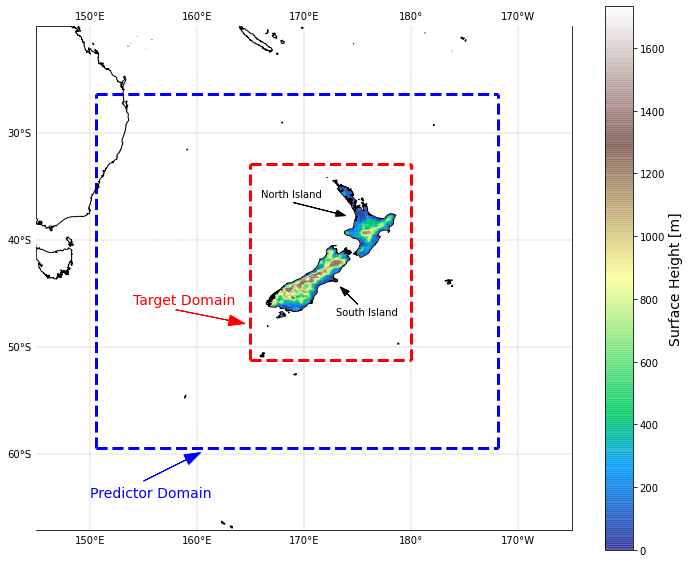

In [148]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from cartopy.io.img_tiles import GoogleTiles
proj = ccrs.PlateCarree(central_longitude=171.77)
# target variables domain
latmin =-51.21
latmax = -32.86
lonmin = 164.9
lonmax = 180.0
# predictor variables domain
latmin_p = -59.38
latmax_p = -26.38
lonmin_p = 150.6
lonmax_p = 188.1

df = xr.open_dataset("/nesi/project/niwa00018/ML_downscaling_CCAM/training_GAN/ancil_fields/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc")

fig, ax = plt.subplots(1, 1, figsize=(12, 10), subplot_kw={'projection': proj})


#fig.show()


ax.coastlines('10m', zorder =15)
ax.plot([lonmin, lonmax],[latmin, latmin], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw =3)
ax.plot([lonmin, lonmax],[latmax, latmax], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw =3)
ax.plot([lonmin, lonmin],[latmin, latmax], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw=3)
ax.plot([lonmax, lonmax],[latmin, latmax], color ='r', transform = ccrs.PlateCarree(), zorder =15, ls ='--', lw=3)



ax.plot([lonmin_p, lonmax_p],[latmin_p, latmin_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
ax.plot([lonmin_p, lonmax_p],[latmax_p, latmax_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
ax.plot([lonmin_p, lonmin_p],[latmin_p, latmax_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
ax.plot([lonmax_p, lonmax_p],[latmin_p, latmax_p], color ='b', transform = ccrs.PlateCarree(), zorder =15, ls ='--',lw =3)
#add labels for the north and south islands. 
ax.set_extent([145, 195,-65,  -20])
#ax.set_extent([lonmin-5, lonmax+5,latmin-5,  latmax+5])
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=.3, color='black', linestyle=':', draw_labels=True, zorder =15
                  ,xlocs=np.arange(150, 190, 10).tolist() + [-170])
cs = df.orog.plot(ax = ax, cmap ='terrain', zorder =11, transform = ccrs.PlateCarree(), alpha =0.8, add_colorbar =False)
cbar = fig.colorbar(cs)
cbar.set_label('Surface Height [m]', fontsize =14)

ax.add_feature(cart.feature.OCEAN.with_scale('10m'), color ='white', zorder =12, alpha =1, ec ='k')
ax.text(166, -36, 'North Island', transform = ccrs.PlateCarree(), zorder =17)
ax.text(173, -47, 'South Island', transform = ccrs.PlateCarree(), zorder =17)
ax.arrow(169, -36.5,4, -1, zorder =19, transform = ccrs.PlateCarree(), head_width =0.6, color ='k')
ax.arrow(175, -46,-1, 1, zorder =19, transform = ccrs.PlateCarree(), head_width =0.6, color ='k')
ax.arrow(158, -46.5,5, -1, zorder =19, transform = ccrs.PlateCarree(), head_width =1, color ='r')
ax.text(154, -46, 'Target Domain', transform = ccrs.PlateCarree(), zorder =17, color ='r', fontsize =14)
ax.text(150, -64, 'Predictor Domain', transform = ccrs.PlateCarree(), zorder =17, color ='b', fontsize =14)
ax.arrow(155, -62.5,4, 2, zorder =19, transform = ccrs.PlateCarree(), head_width =1, color ='b')
#ax.annotate('', xy=(166, -36), xytext=(173, -47), arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color='black'))

gl.top_labels = True
gl.left_labels = True
fig.show()


In [77]:
gl.

True

In [37]:
ccrs.RotatedPole(l)

cartopy.crs.RotatedPole